In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
training_set = pd.read_csv('titanic/train.csv')

In [9]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Исследование данных

<AxesSubplot:>

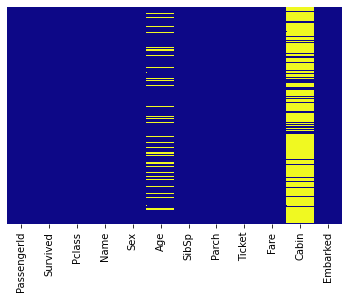

In [13]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [14]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

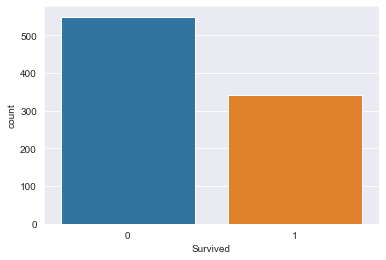

In [15]:
sns.countplot(x='Survived', data=training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

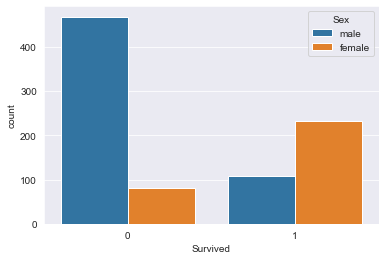

In [16]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

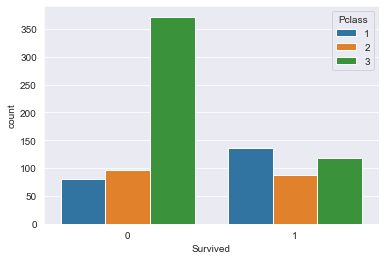

In [17]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

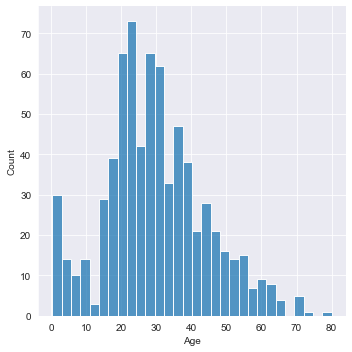

In [19]:
sns.displot(training_set['Age'].dropna(), bins=30)

<AxesSubplot:ylabel='Frequency'>

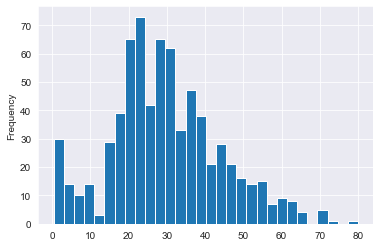

In [23]:
training_set['Age'].plot.hist(bins=30)

In [24]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

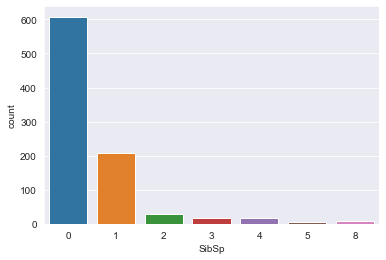

In [25]:
sns.countplot(x='SibSp', data=training_set)

<AxesSubplot:>

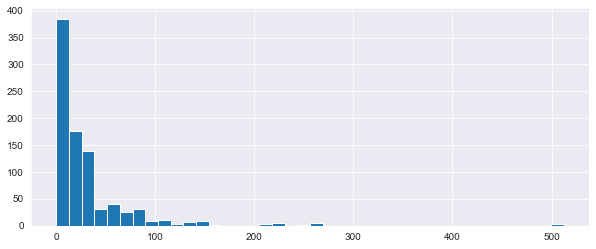

In [28]:
training_set['Fare'].hist(bins=40, figsize=(10, 4))

# Подготовка данных

## Imputation
https://en.wikipedia.org/wiki/Imputation_(statistics)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

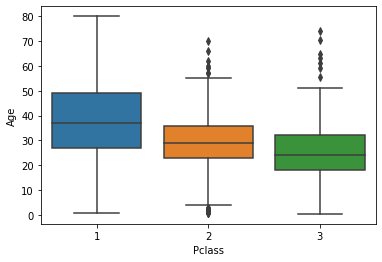

In [4]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

In [41]:
def impute_age(columns):
    """ Функция для импутации Age"""
    
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [6]:
training_set['Age'] = training_set[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

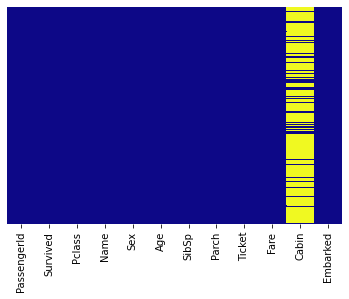

In [7]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [8]:
training_set.drop('Cabin', axis=1, inplace=True)

In [9]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

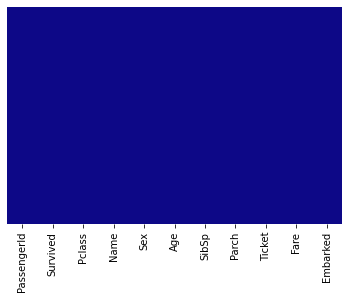

In [17]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [18]:
training_set.dropna(inplace=True) # Избавляемся от оставшихся NaN

## Создание фиктивной (dummy) переменной для Sex и Embarked

In [29]:
# Избавляемся от мультиколлинеарности
# Т. к. столбцы male и female являются идеальными предсказателями друг друга (испозльуем drop_first)
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [23]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [27]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [31]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [32]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
training_set.drop('PassengerId', axis=1, inplace=True)

In [40]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Работа с моделью

In [42]:
# Разделяем данные
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=333)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lrm = LogisticRegression()

In [47]:
lrm.fit(X_train, y_train)

/Users/daniilchernyshov/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
predictions = lrm.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       217
           1       0.74      0.64      0.69       139

    accuracy                           0.77       356
   macro avg       0.76      0.75      0.75       356
weighted avg       0.77      0.77      0.77       356



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, predictions)

array([[186,  31],
       [ 50,  89]])